In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

%matplotlib inline


(353, 360, 3)

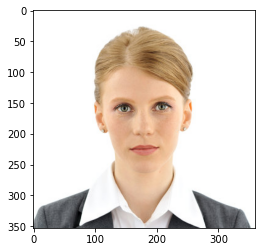

In [99]:

# path = "/Users/alirezakheirandish/Downloads/360_F_104320569_XEbkN4zdeOXtyyAA4cXaZgTuw6SgIspf.jpeg"
path = "/Users/alirezakheirandish/Downloads/360_F_75331081_axIcnWZnT1RbSsPGlgLQaCftelG158KV.jpeg"
img = mpimg.imread(path)
m = np.array(img.shape)

I = img[:-7,:,:]

# I = cv2.resize(img,(640, 640))

imgplot = plt.imshow(I)
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res19_near.jpeg",img)
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res21_near.jpeg",I)
I.shape

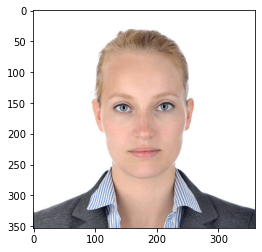

In [102]:
# path1 = "/Users/alirezakheirandish/Downloads/unnamed.jpeg"
path1 = "/Users/alirezakheirandish/Downloads/istockphoto-615279718-612x612.jpeg"
img1 = mpimg.imread(path1)
m1 = np.array(img1.shape)
# m = m - 30
# I1 = img1[30:int(m1[0]/5),30:int(m1[1]/5)]
# imgplot = plt.imshow(I1[270:300,:,:])
#
#
I1 = cv2.resize(img1,(360, 360))
I1 = np.roll(I1,-7,axis = 0)[:-7,:,:]
m1 = np.array(I1.shape)
imgplot = plt.imshow(I1)
m1
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res20_far.jpeg",img1)
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res22_far.jpeg",I1)

In [103]:
I_0 = I
I_1 = I1

In [109]:
fft_img = np.zeros_like(I_0,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(I_0[:,:,ichannel]))
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res23-dft-near.jpg",np.uint8(20*np.log10(np.abs(fft_img+1))))

fft_img = np.zeros_like(I_1,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(I_1[:,:,ichannel]))
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res24-dft-far.jpg",np.uint8(20*np.log10(np.abs(fft_img+1))))

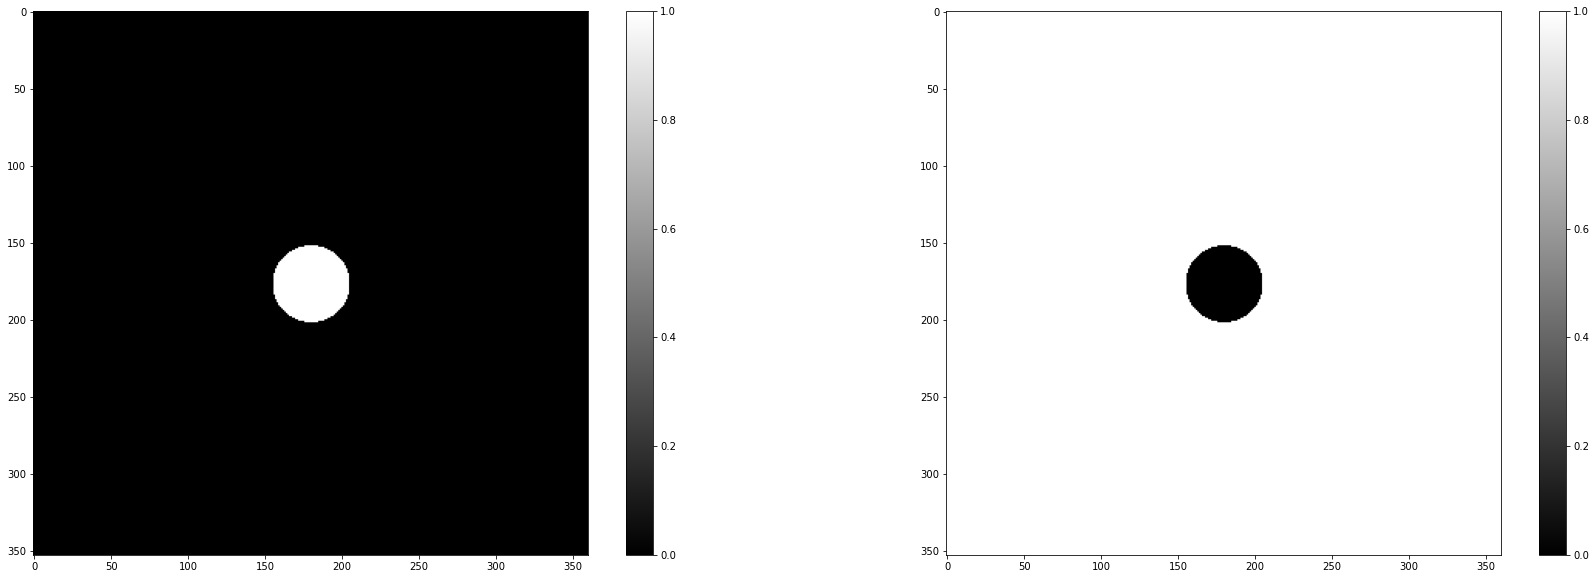

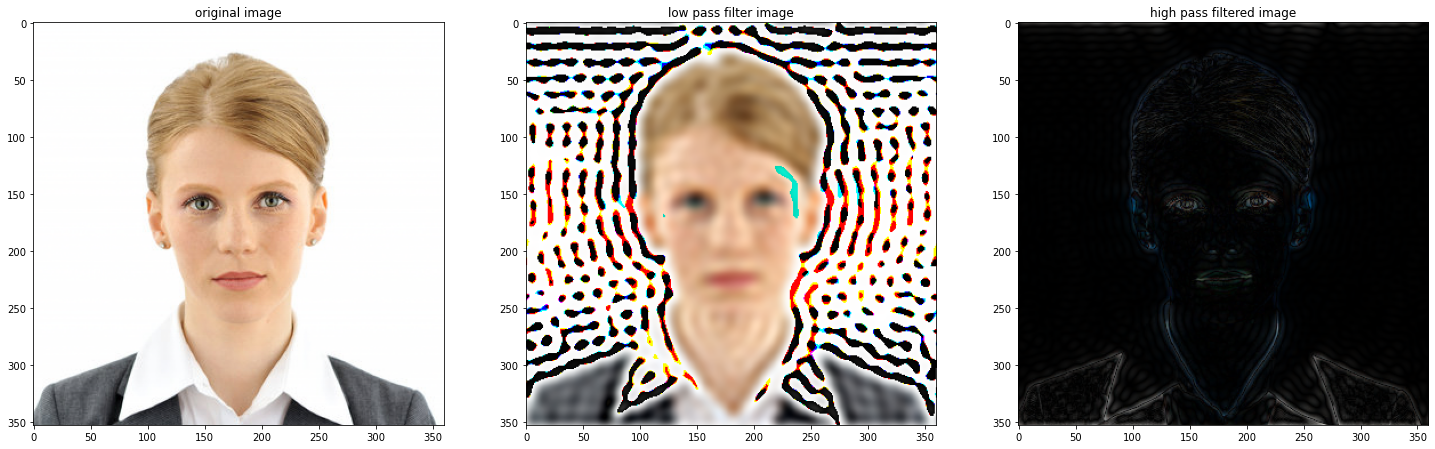

In [116]:
shape = I_0.shape[:2]

def cicle(shape,R):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0
    for i in range(shape[0]):
        for j in range(shape[1]):
            TF[i,j] = (i- center[0])**2 + (j - center[1])**2 < R **2
    return(TF)


TFcircleIN   = cicle(shape=I_0.shape[:2],R=25)
TFcircleOUT  = ~TFcircleIN

plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res25-highpass-25.jpg",TFcircleOUT)


fft_img = np.zeros_like(I_0,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(I_0[:,:,ichannel]))


fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    fft_img_filtered_IN.append(temp)

    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleOUT] = fft_img_channel[TFcircleOUT]
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))


plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res27-highpassed.jpg",np.uint8(20*np.log10(np.abs(fft_img_filtered_OUT+1))))


def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)


In [119]:
shape = I_1.shape[:2]

def cicle(shape,R):
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=np.bool)
    center = np.array(TF.shape)/2.0
    for i in range(shape[0]):
        for j in range(shape[1]):
            TF[i,j] = (i- center[0])**2 + (j - center[1])**2 < R **2
    return(TF)


TFcircleIN   = cicle(shape=I_1.shape[:2],R=30)
TFcircleOUT  = ~TFcircleIN
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res26-lowpass-30.jpg",TFcircleIN)
fft_img = np.zeros_like(I_1,dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(I_1[:,:,ichannel]))
    

fft_img_filtered_IN_1 = []
fft_img_filtered_OUT_1 = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    fft_img_filtered_IN_1.append(temp)

    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleOUT] = fft_img_channel[TFcircleOUT]
    fft_img_filtered_OUT_1.append(temp)  
    
fft_img_filtered_IN_1 = np.array(fft_img_filtered_IN_1)
fft_img_filtered_IN_1 = np.transpose(fft_img_filtered_IN_1,(1,2,0))
fft_img_filtered_OUT_1 = np.array(fft_img_filtered_OUT_1)
fft_img_filtered_OUT_1 = np.transpose(fft_img_filtered_OUT_1,(1,2,0))


plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res28-lowpassed.jpg",np.uint8(20*np.log10(np.abs(fft_img_filtered_IN_1+1))))


def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco_1              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN_1  = inv_FFT_all_channel(fft_img_filtered_IN_1)
img_reco_filtered_OUT_1 = inv_FFT_all_channel(fft_img_filtered_OUT_1)


In [121]:
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res29-hybrid.jpg",np.uint8(20*np.log10(np.abs(fft_img_filtered_IN_1*2/5+1+fft_img_filtered_OUT/2))))



In [130]:
# fig = plt.figure(figsize=(10,10))
# ax  = fig.add_subplot(1,3,1)
# ax.imshow(np.uint8(np.abs(img_reco_filtered_IN_1*2/5+img_reco_filtered_OUT/2)))
# ax.set_title("original image")
plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res30-hybrid-near.jpg",np.uint8(np.abs(img_reco_filtered_IN_1*2/5+img_reco_filtered_OUT/2)))
temp = np.uint8(np.abs(img_reco_filtered_IN_1*2/5+img_reco_filtered_OUT/2))
temp = cv2.resize(temp,(100,100),interpolation=cv2.INTER_CUBIC)

plt.imsave("/Users/alirezakheirandish/Downloads/HW2 (1)/results/res31-hybrid-far.jpg",temp)



<Figure size 720x720 with 0 Axes>

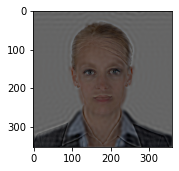

In [136]:
fig = plt.figure(figsize=(2.5,2.5))
plt.imshow(np.uint8(np.abs(img_reco_filtered_IN_1*2/5+img_reco_filtered_OUT/2)))

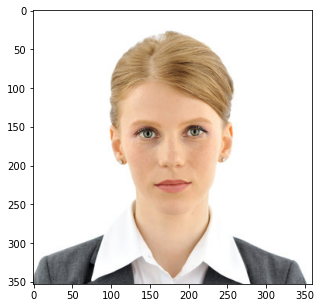

In [75]:
fig = plt.figure(figsize=(5,10))
plt.imshow(I_0)